# Introducción a la inferencia estadística
#IE03 Graficando distribuciones de probabilidades



Nota: Los contenios de este notebook están basados en el trabajo de Raúl E. López Briega. El contenido esta bajo la licencia BSD de Raúl E. López Briega.

## <font color='blue'>Graficando distribuciones</font>

### Histogramas

Una de las mejores maneras de describir una variable discreta es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un [histograma](https://es.wikipedia.org/wiki/Histograma), el cual es un gráfico que muestra la frecuencia de cada valor.

En Python, podemos graficar fácilmente un histograma con la ayuda de la función `hist` de `matplotlib`, simplemente debemos pasarle los datos y la cantidad de *contenedores* (_bins_) en los que queremos dividirlos. Por ejemplo, podríamos graficar el histograma de una distribución normal del siguiente modo.

In [1]:
# importando módulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros estéticos de seaborn
sns.set_palette("Reds", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

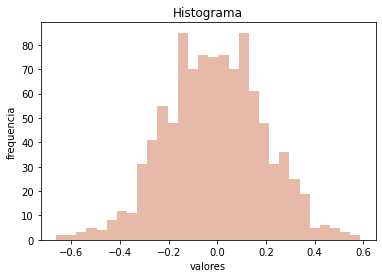

In [2]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desviación estándar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
frecuencias, bins, ignorar = plt.hist(datos, 30, cumulative=False)
plt.hist(datos, 30, cumulative=False)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

In [3]:
print(frecuencias)
print(bins)
print(type(ignorar))

[ 2.  2.  3.  5.  4.  8. 12. 11. 31. 41. 55. 48. 85. 70. 76. 75. 76. 70.
 85. 61. 48. 31. 36. 25. 19.  5.  6.  5.  3.  2.]
[-0.66224414 -0.62058296 -0.57892179 -0.53726062 -0.49559945 -0.45393828
 -0.41227711 -0.37061594 -0.32895477 -0.2872936  -0.24563242 -0.20397125
 -0.16231008 -0.12064891 -0.07898774 -0.03732657  0.0043346   0.04599577
  0.08765695  0.12931812  0.17097929  0.21264046  0.25430163  0.2959628
  0.33762397  0.37928514  0.42094631  0.46260749  0.50426866  0.54592983
  0.587591  ]
<class 'matplotlib.cbook.silent_list'>


### Función de Masa de Probabilidad

Otra forma de representar a las distribuciones discretas es utilizando su [Función de Masa de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) o FMP (**pmf**, *probability mass function*, en inglés), la cual relaciona cada valor con su **probabilidad** en lugar de su **frecuencia** como vimos anteriormente. Esta función es *normalizada* de forma tal que el valor total de probabilidad sea 1. 

<br>
<img src="https://drive.google.com/uc?export=view&id=1fhf1UNOd3GXBSm35eaVM330OBmZVF80n" width="450">
<br>

Créditos:  Oleg Alexandrov - Trabajo propio, [Dominio público](https://commons.wikimedia.org/w/index.php?curid=2073424).

La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. También debemos tener en cuenta que FMP] funciona bien si el número de valores es pequeño; pero a medida que el número de valores aumenta, la probabilidad asociada a cada valor se hace cada vez más pequeña y el efecto del **ruido aleatorio** aumenta. 
Veamos un ejemplo.

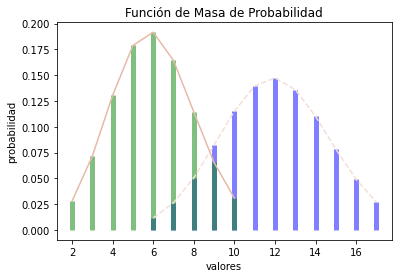

In [4]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de Distribución Acumulada

Si queremos evitar los problemas que se generan con la FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la [Función de Distribución Acumulada](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) o **FDA** (**cdf**, *cumulative distribution function*, en inglés), para representar a nuestras distribuciones, tanto **discretas** como **continuas**. Esta función relaciona los valores con su correspondiente [percentil](https://es.wikipedia.org/wiki/Percentil); es decir, que va a describir la probabilidad de que una variable aleatoria $X$ sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.

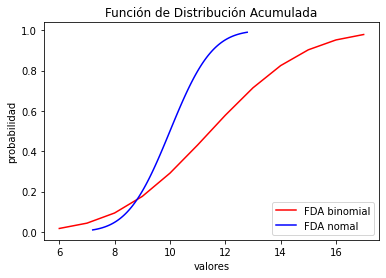

In [5]:
# Graficando Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, color='r', label='FDA binomial')
plt.plot(x_1, fda_normal, color='b', label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

### Función de Densidad de Probabilidad 

Por último, el equivalente a la __FMP__ para distribuciones __continuas__ es la [Función de Densidad de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) o __FDP__ (**pdf**, *probability density function*, en inglés). Esta función es la derivada de la Función de Distribución Acumulada.

Por ejemplo, para la distribución normal que graficamos anteriormente, su FDP es la típica forma de campana que caracteriza a esta distribución.

<br>
<img src="https://drive.google.com/uc?export=view&id=1_czlkiFMJ8MadzG2ipVRWzXNeR8RgzG0" width='500'> 
<br>

Créditos imágen: De Ainali - Trabajo propio, [CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=3141713) 


In [ ]:
# Graficando Función de Densidad de Probibilidad con Python
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, color='r', label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()